In [1]:
import xarray as xr
import numpy as np
from dask.distributed import Client
import matplotlib as mpl
from carbon_math import carbon_flux
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import xesmf as xe
from scipy.stats import linregress
import os

In [2]:
#Lets import our functions. There are no tests here. Stored separately so as to not make a mess.
from model_cutting_functions import CAFE60_eqpac_cutter, cut_regrid_reynolds_sst,cut_process_sst_obs_trends,proc_landschutzer,process_co2_land_trends

In [ ]:
#The CAFE60_eqpac_cutter, given type and variable, will cut either the global oceans or eqpac out, save and create trends. If Force, then will delete any existing files. 
'''CAFE60_eqpac_cutter(modelType='BGC',
                        variable=None,
                        cut_eqpac=True,
                        save_all_data=False,
                        convert_times=True,
                        mean_of_ensemble=True,
                        fix_long_coords=True,
                        trend=False,
                        conversion=None,
                        ensemble_trends=False,
                        startday=1982,
                        endday=2020,
                        unit_fixer=False,
                        regridder=False,
                        plot=True,
                        force=False,
                        savepath='/scratch1/pit071/CAFE60/processed/')'''

Starting on Variable: sst
Begin Dataset Size: 29.85984 GB
Mean Ens Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/sst_ensmean_1982.nc
1982 trend Dataset already exists /scratch1/pit071/CAFE60/processed/eqpac/sst_meantrends_1982.nc
2000 trend Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/sst_meantrends_2000.nc


/home/pit071/CAFE60_eqpac/model_cutting_functions.py:251: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


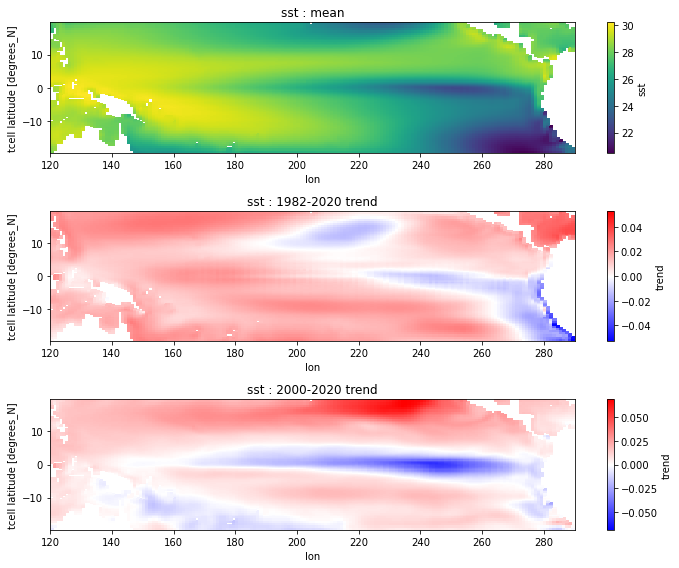

In [3]:
#Process CAFE SST for equatorial Pacific

CAFE60_eqpac_cutter(modelType='physics',
                        variable='sst',
                        cut_eqpac=True,
                        save_all_data=False,
                        trend=True,
                        force=False)

In [4]:
CAFE60_eqpac_cutter(modelType='BGC',
                        variable=['stf10','pprod_gross_2d','export_prod','surface_zoo','surface_dic'],
                        cut_eqpac=True,
                        save_all_data=False,
                        trend=True,
                        plot=False,
                        force=False)

Starting on Variable: stf10
Begin Dataset Size: 29.85984 GB
Mean Ens Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/stf10_ensmean_1982.nc
1982 trend Dataset already exists /scratch1/pit071/CAFE60/processed/eqpac/stf10_meantrends_1982.nc
2000 trend Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/stf10_meantrends_2000.nc
Starting on Variable: pprod_gross_2d
Begin Dataset Size: 29.85984 GB
Mean Ens Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_ensmean_1982.nc
1982 trend Dataset already exists /scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_meantrends_1982.nc
2000 trend Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_meantrends_2000.nc
Starting on Variable: export_prod
Begin Dataset Size: 29.85984 GB
Mean Ens Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/export_prod_ensmean_1982.nc
1982 trend Dataset already exists /scratch1/pit071/CAFE60/processed/eqpac/export_prod_mea

/home/pit071/CAFE60_eqpac/model_cutting_functions.py:251: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Mean Ens Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/surface_dic_ensmean_1982.nc
1982 trend Dataset already exists /scratch1/pit071/CAFE60/processed/eqpac/surface_dic_meantrends_1982.nc
2000 trend Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/surface_dic_meantrends_2000.nc


In [3]:
#Cut out global and eqpac reynolds SST and calculate trends for them. Saved in /scratch1/pit071/CAFE60/processed/obs/
cut_regrid_reynolds_sst(True,True) #Cut eqpac SST,force (If force=True will delete any existing file and resave)
cut_regrid_reynolds_sst(False,True) #Cut global SST and force save 
cut_process_sst_obs_trends(True) #Force trends for both global and eqpac. Should do both eqpac and global.  

Reuse existing file: bilinear_180x170_300x360.nc


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


saving: /scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.eqpac.nc
Reuse existing file: bilinear_180x360_300x360.nc


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


saving: /scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.global.nc
saving 82 sst trends
saving 2000 sst trends
saving 82 sst trends
saving 2000 sst trends


In [6]:
#Basically the same as above but for landshutzer.
#proc_landschutzer(False,True) 
proc_landschutzer(True,True)
process_co2_land_trends(True)

Reuse existing file: bilinear_180x360_300x360.nc
